Heart Disease Dataset - predict whether a person will have heart disease or not
1. Age 
2. Sex 
3. Chest pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. Resting blood pressure in mmHg
5. Serum cholestoral in mg/dl
    - Represents the amount of total cholesterol in blood
6. Fasting blood sugar > 120 mg/dl (CAT)
7. Resting electrocardiographic results (values 0,1,2) (CAT)
    - Simple and fast test used to evaluate the heart, basically describes how the heart is beating.
    - Value 0: Normal
    - Value 1: having ST-T wave abnormality - means that something about your heart is unusual but doesn’t indicate what. It could be anything from “You are are young and athletic” to “You are in the early stages of having a heart attack” (which could be fatal)
8. Maximum heart rate achieved
    - Also know as Thalach
9. Exercise induced angina (CAT)
    - Angina is a type of chest pain caused by reduced blood flow to the heart. Is a symptom to a few diseases.
    - Value 0: Normal
    - Value 1: Exercise induced angine
10. Oldpeak = ST depression induced by exercise relative to rest 
    - Difference between a local maxima and minima in the ST section of the ECG
11. Slope of the peak exercise ST segment (CAT)
    - Slope of the ST section of the ECG
12. Number of major vessels (0-3) colored by flourosopy (CAT)
    - Flourosopy is a continous x-ray, like a x-ray video
13. Thalassemia: 0 = normal; 1 = fixed defect; 2 = reversable defect (CAT)
    - an inherited blood disorder caused when the body doesn't make enough of a protein called hemoglobin

Import packages and datasets - Done<br />
Prepocessing of data
-Interpret the variables
-info.(), describe()
-Outliers, scale the data, encode categorical variable

EDA<br />
-Basic exploration (E.g. univariate analysis of numeric variable), check for missing value 
-Univariate analysis of 8 categorical variable 
-Heatmap (show correlation) 5 numerical variables
-Normalising data

ML models<br />
-Linear Regression (if results unfavourable/data not linear, can do logreg)
-Random Forest
-Perceptron

Evaluate models<br />
-Use train/test split to evaluate performance


In [1]:

import pandas as pd
import numpy as np

# For data preprocessing and EDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve



In [2]:
df = pd.read_csv('/Users/bshan/Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
# Data check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Firstly, we notice there are no null values, so there is no need to do much cleaning. We'll check for outliers later when we plot the graphs.

- From head, info, and nunique we know that there are 8 categorical variables and 5 numeric variables. 

- Categorical Variables: 
- Sex A(1 = male; 0 = female)
- CP (Chest Pain Type, The type of chest pain experienced by the patient. It's categorized into different types, ranging from 0 to 3, representing different levels of severity of chest pain, 0 = least severe/not pain)
- FPS (fasting blood sugar > 120 mg/dl, 1 = true; 0 = false)
- RESTECH (Resting Electrocardiographic Results, 0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
- EXANG (Exercise Induced Angina,  Indicates whether the patient experienced exercise-induced angina. 1 = yes, 0 = no)
- CA (Number of Major Vessels Colored by Fluoroscopy, Represents the number of major blood vessels (0-3) colored by fluoroscopy. This could be an indicator of blood flow restrictions or blockages, 0 = no blood vessels colored by fluoroscopy)
- SLOPE (Slope of the Peak Exercise ST Segment, Describes the slope of the peak exercise ST segment. 0 =flat, 1 = upsloping, 2 = downsloping)
- THAL (Thalassemia, A categorical variable representing thalassemia, which could have values 0 = normal, 1 = fixed defect, 2 = reversible defect)
- TARGET 

But we notice a few errors:
CA is suppoed to be in range (0-3), but in the dataset are values 0,1,2,3 and 4, as shown by nuinque
Same thing for 'thal'. There should be just 0, 1, and 2, but there is also 4. 

Let's investigate

```diff
- TARGET is an interesting case we will cover later 
```




In [6]:

# Display unique values in 'ca' and 'thal' columns and their counts
ca_values = df['ca'].value_counts()
thal_values = df['thal'].value_counts()

ca_values, thal_values


(ca
 0    578
 1    226
 2    134
 3     69
 4     18
 Name: count, dtype: int64,
 thal
 2    544
 3    410
 1     64
 0      7
 Name: count, dtype: int64)

hang on, "thal" doesnt look normal... How can a wrong variable (thal = 3) have such a high count? Maybe 0 is wrong? that is more likely. Let's remove these wrong values

In [7]:
# Remove incorrect entries
df = df[(df['ca'] != 4) & (df['thal'] != 0)]

# Verify the cleanup by showing the unique values and counts again
cleaned_ca_values = df['ca'].value_counts()
cleaned_thal_values = df['thal'].value_counts()
cleaned_ca_values, cleaned_thal_values, df.shape


(ca
 0    571
 1    226
 2    134
 3     69
 Name: count, dtype: int64,
 thal
 2    533
 3    403
 1     64
 Name: count, dtype: int64,
 (1000, 14))

So now, "thal" will be 1 = normal, 2 = fixed defect, 3 = reversible defect

In [8]:
# Checking for duplicates in the dataset
duplicate_rows = df.duplicated().sum()
duplicate_rows


704

# Oh dear

This is very disappointing... Most of the dataset seems to be duplicates. The sample size is now 1000 - 704 = 296. 70.4% Duplicates, not great, not terrible
<br />
We decide to remove these, and continue with sample of size 296. It should be enough still enough. 
<br />
<br />
Number of features(columns): 13<br />
Data points: 296 


In [9]:
# Removing duplicate rows from the dataset
original_shape = df.shape
df = df.drop_duplicates()

# Checking the shape of the new data to confirm removal

cleaned_shape = df.shape
original_shape, cleaned_shape


((1000, 14), (296, 14))

# Categorical Variables

We'll now take a look at categorical variables, observing the number and distrubution to ensure no irregularities

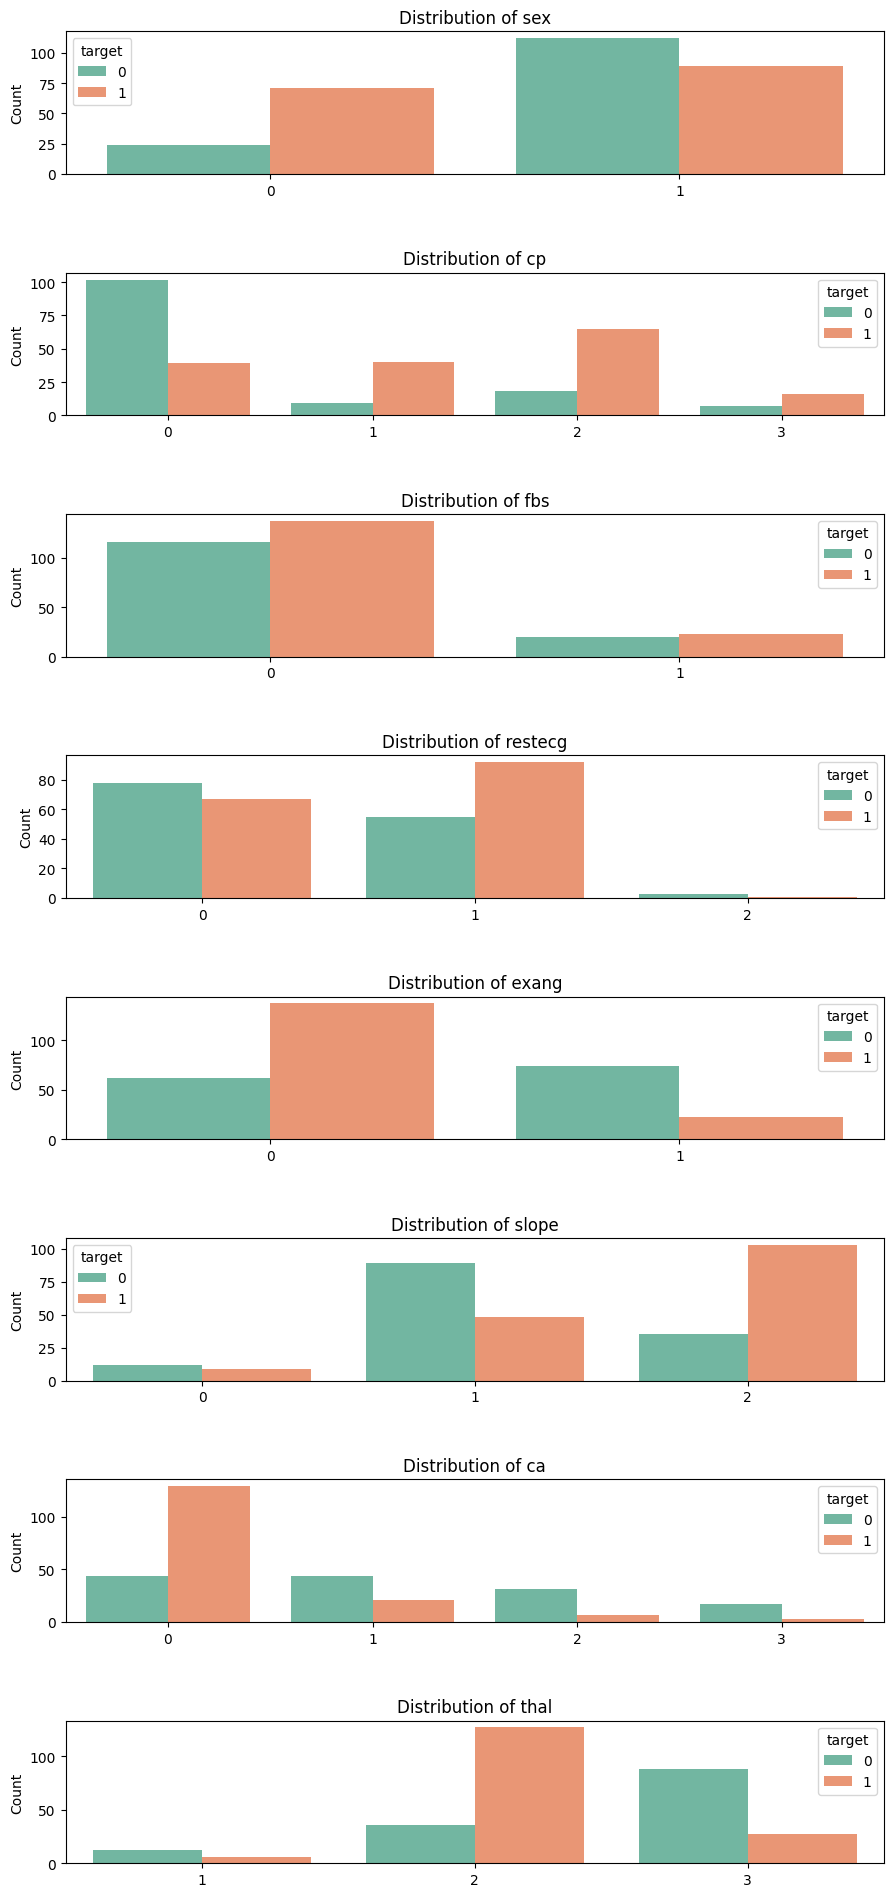

{'sex': sex
 1    201
 0     95
 Name: count, dtype: int64,
 'cp': cp
 0    141
 2     83
 1     49
 3     23
 Name: count, dtype: int64,
 'fbs': fbs
 0    253
 1     43
 Name: count, dtype: int64,
 'restecg': restecg
 1    147
 0    145
 2      4
 Name: count, dtype: int64,
 'exang': exang
 0    199
 1     97
 Name: count, dtype: int64,
 'slope': slope
 2    138
 1    137
 0     21
 Name: count, dtype: int64,
 'ca': ca
 0    173
 1     65
 2     38
 3     20
 Name: count, dtype: int64,
 'thal': thal
 2    163
 3    115
 1     18
 Name: count, dtype: int64}

In [10]:
# Define categorical columns based on the dataset description
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Generate frequency distributions for each categorical variable
categorical_summaries = {col: df[col].value_counts() for col in categorical_cols}

# Plotting each categorical variable
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', hue='target')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.show()
categorical_summaries


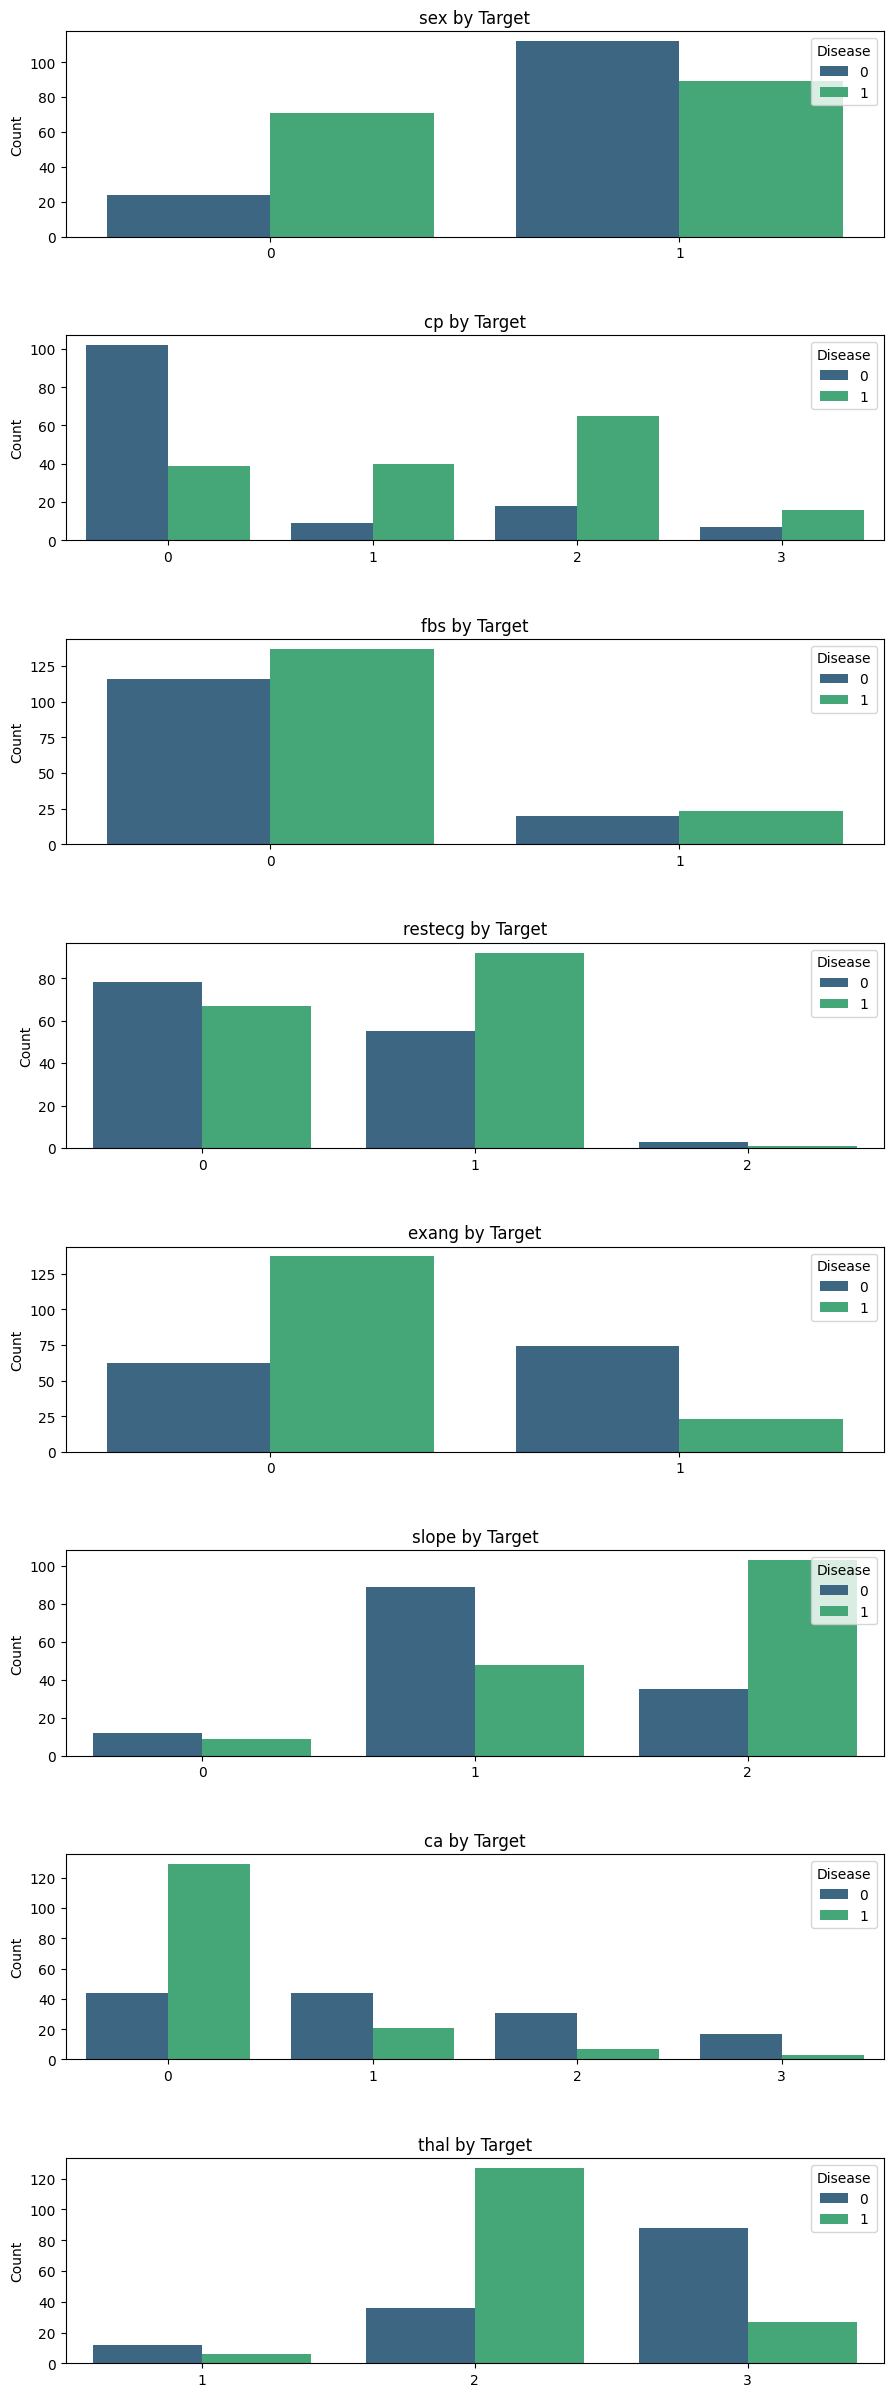

In [11]:
# Visualising relationships between each categorical variable and the target using count plots
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 25))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="target", data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} by Target')
    axes[i].legend(title='Disease', loc='upper right')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.show()


From the plots of Categorical variables with the presence of Disease shows most variables are good indictors of Disease, but some variables like fasting blood sugar > 120 appears to have no effect.

# Numerical variables

Now let's analyse the numerical variables. We'll first plot them and then inspect their correlation with the target(Heart Disease)

1. age 
2. resting blood pressure
3. serum cholestoral in mg/dl
4. maximum heart rate achieved (thalach)
5. oldpeak = ST depression induced by exercise relative to rest 


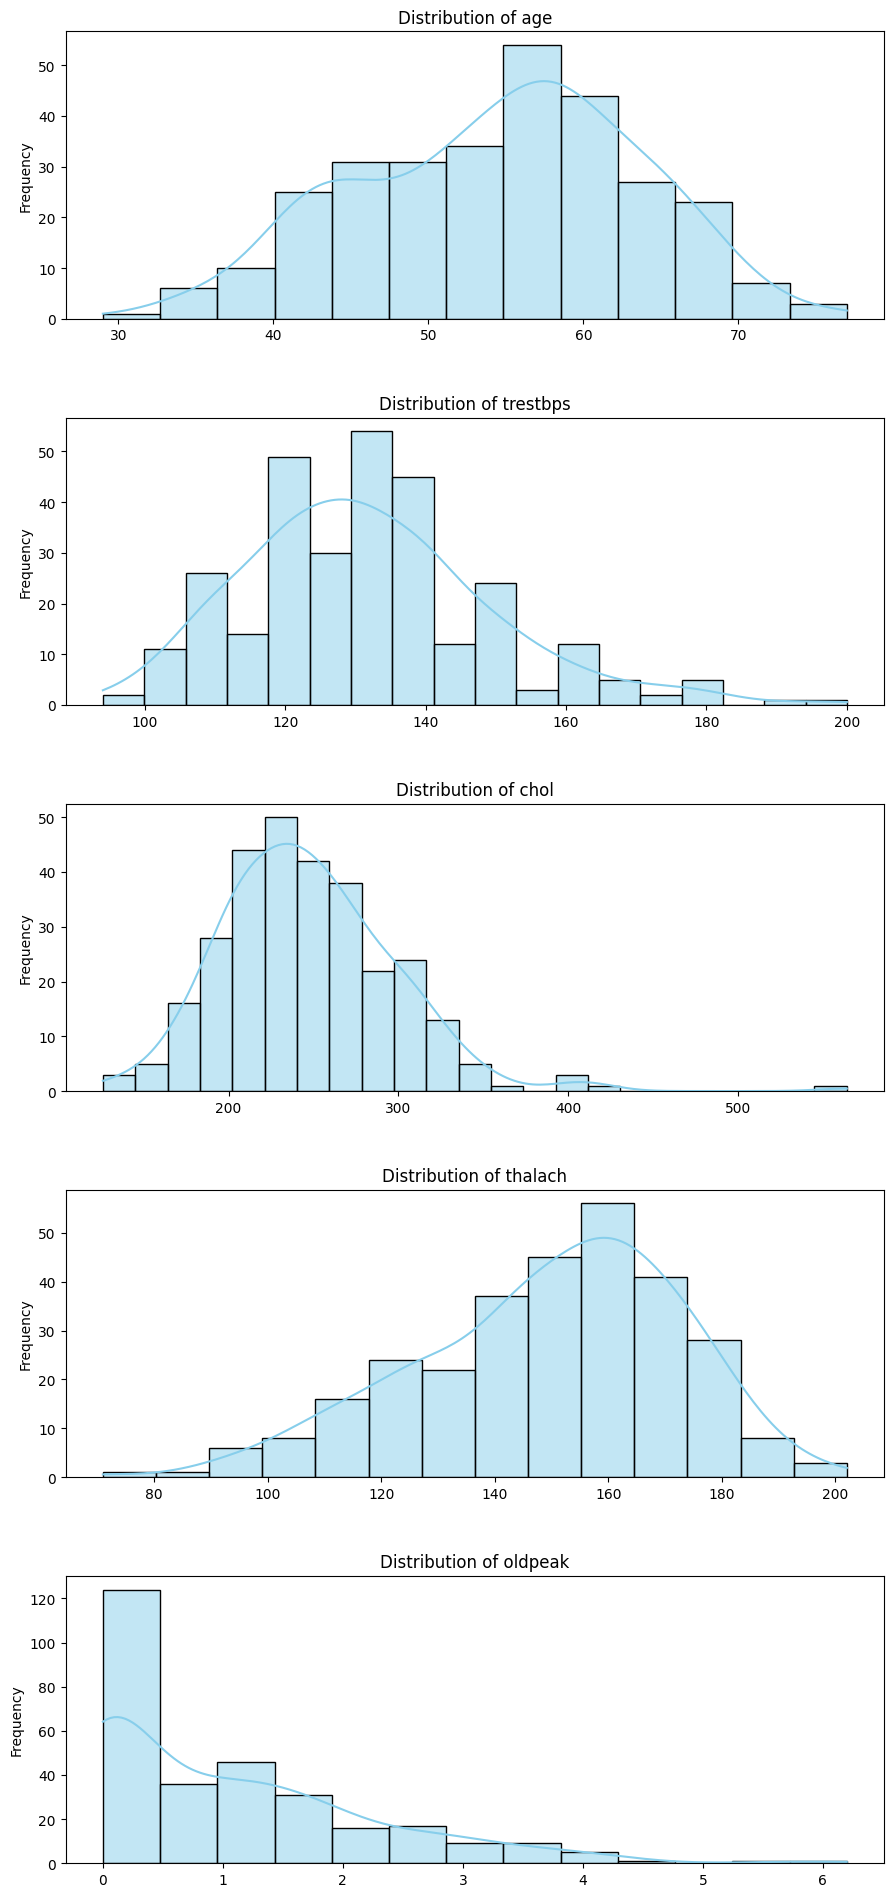

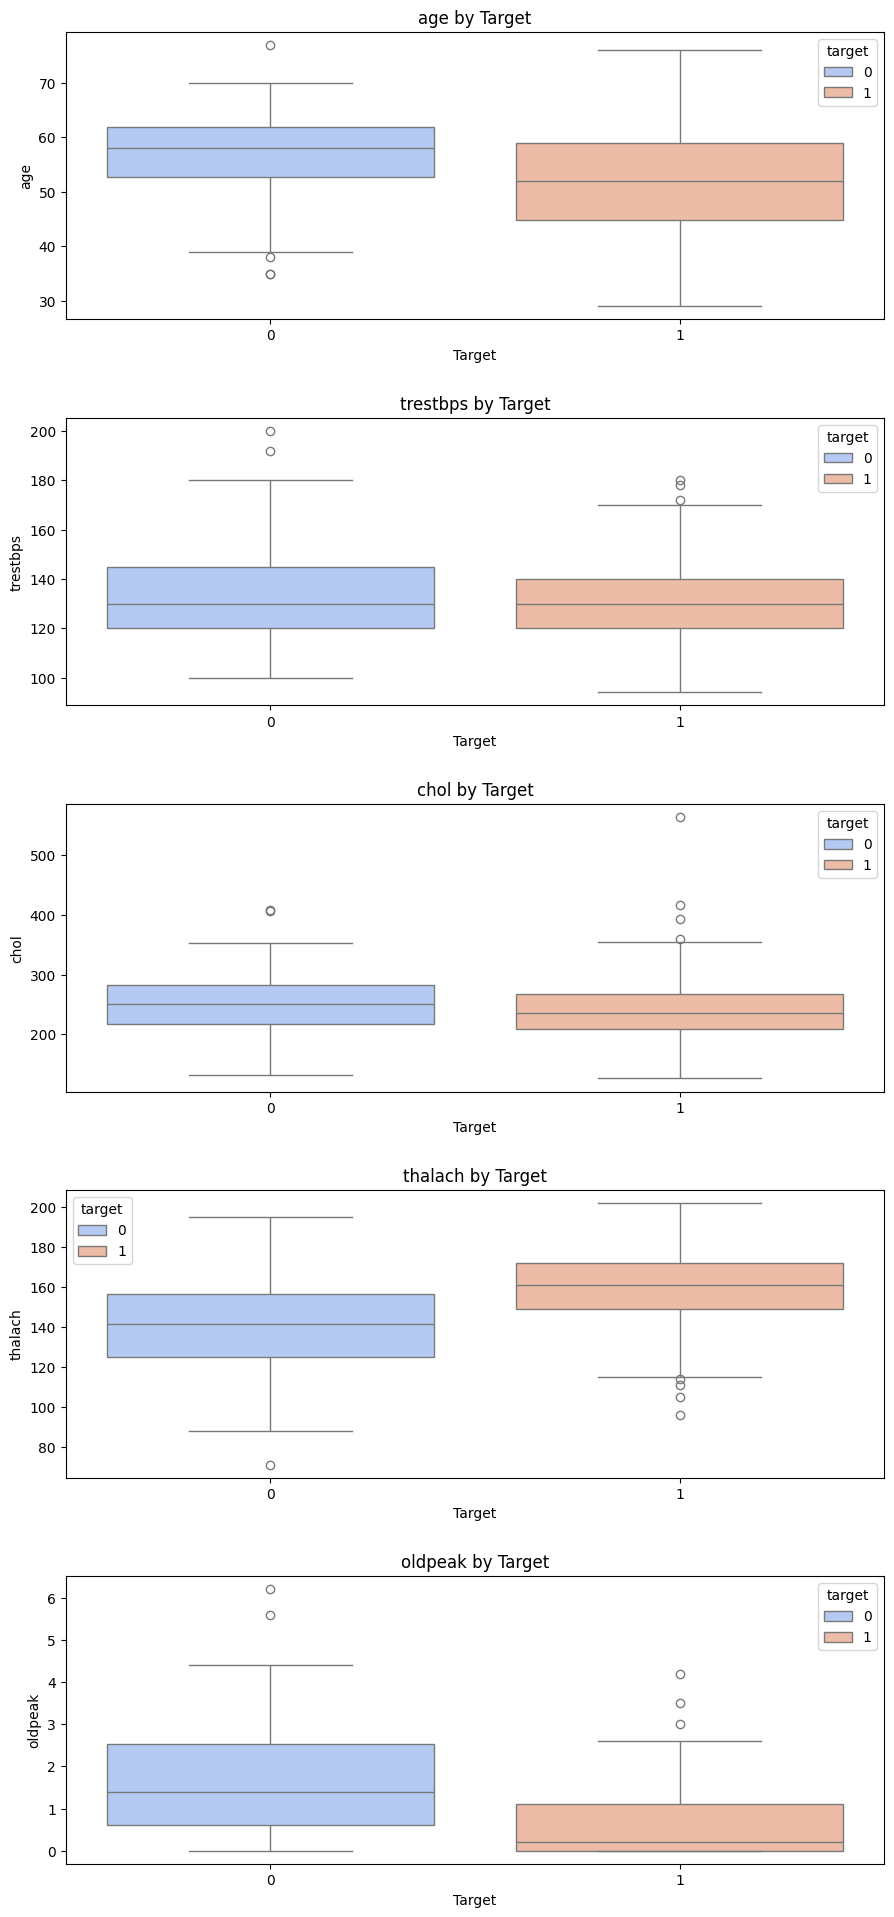

In [12]:
# Define numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plotting histograms for each numerical variable
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.show()

# Boxplots to see how numerical variables relate to the target variable
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='coolwarm', hue='target')
    axes[i].set_title(f'{col} by Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(col)

plt.show()


Distribution of Numerical Variables
The histograms show the following distributions for each numerical variable:

- Age: Appears to be normally distributed with a slight right skew, indicating a higher proportion of middle-aged to elderly patients.
- Resting Blood Pressure (trestbps): Also approximately normally distributed, with some outliers indicating very high blood pressure values.
- Serum Cholesterol (chol): Shows a right skew, suggesting that higher cholesterol levels are less common but present.
- Maximum Heart Rate Achieved (thalach): Appears left-skewed, meaning most patients have a higher maximum heart rate, with fewer having lower rates.
- ST Depression Induced by Exercise Relative to Rest (oldpeak): Right-skewed, indicating that most patients have lower values, but there is a tail of patients with higher values.

Relationship of Numerical Variables to Heart Disease (Target)
The boxplots illustrate how numerical variables relate to the presence or absence of heart disease:

- Age: Patients with heart disease tend to be slightly younger in this dataset.
- Resting Blood Pressure: There's a subtle difference in median blood pressure between patients with and without heart disease.
- Serum Cholesterol: Cholesterol levels do not show a clear pattern in relation to heart disease, with similar medians for both groups.
- Maximum Heart Rate Achieved: There is a noticeable difference; patients with heart disease tend to have higher maximum heart rates.
- ST Depression (oldpeak): Patients with heart disease generally have higher oldpeak values, indicating more significant exercise-induced ST depression.


```diff
- SOMETHING IS WRONG!!!!
```

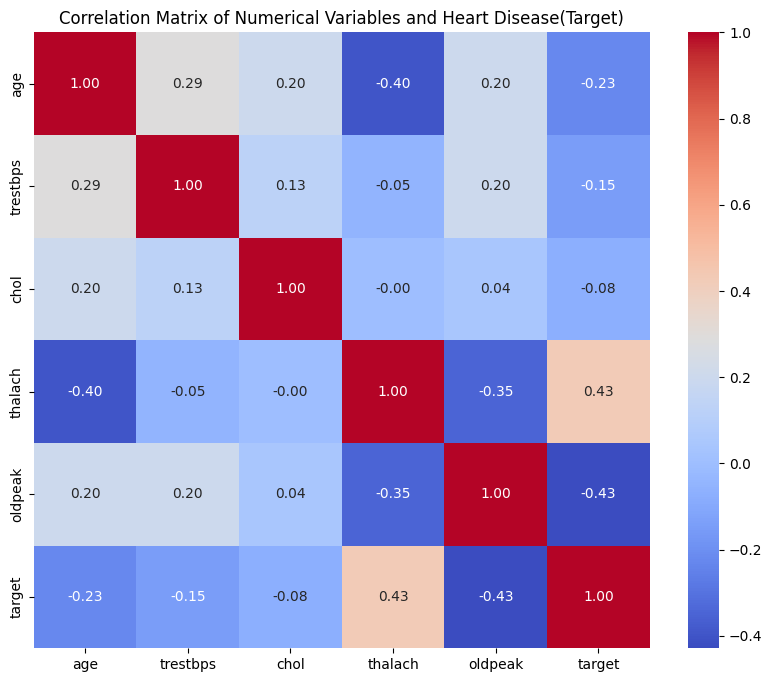

In [13]:
# Calculate the correlation matrix for the numerical variables including the target
correlation_matrix = df[numerical_cols + ['target']].corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Variables and Heart Disease(Target)')
plt.show()


The heatmap above displays the correlation matrix for the numerical variables and Heart Disease. 

- Thalach (Maximum Heart Rate Achieved): Shows a moderate positive correlation with the target and is inversely related to age, which is expected as younger individuals typically achieve higher heart rates.
- Oldpeak (ST Depression): Shows a negative correlation with the target, indicating that more severe exercise-induced ST depression is associated with the absence of heart disease. It also correlates positively with age.
- Age: Correlates positively with oldpeak and negatively with thalach, fitting with typical physiological changes as age increases.
- Resting Blood Pressure (trestbps) and Serum Cholesterol (chol): These variables show relatively low correlations with the target, suggesting they might be less predictive of heart disease in this particular dataset.

In [14]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[26  7]
 [ 4 23]]


Accuracy of Logistic Regression: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.85      0.81        27

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

